## <div style="text-align: center; color: red">Gradient Descent Algorithm</div>

#### Gradient descent is an optimization algorithm used to minimize the loss/cost function in machine learning models, particularly in the context of training models using techniques like linear regression, logistic regression, neural networks, and more.

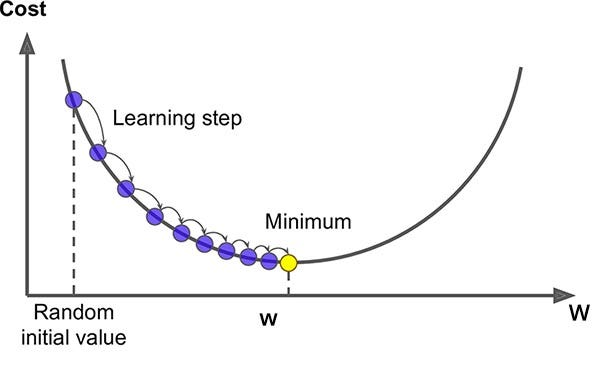 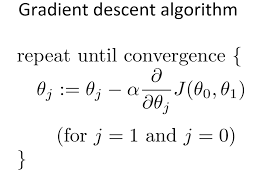
#### <div style="color: grey">The above gradient descent formula can also be written as w = w - L * (partial derivative of cost function wrt w). Here, w is the weight, L is the learning rate and cost function is just an another name for loss function or mean squared error. We apply the same formula for bias 'b' also.</div>

#### Below is the gradient descent algorithm for Age vs. Charges graph for non-smoking people

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('medical.csv')
non_smokers = data[data.smoker == 'no']

In [52]:
''' Computation time is much longer   (for 500 iterations it takes around 2-3 minutes)

def step_gradient(w_current, b_current, points, learning_rate):
    w_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].age
        y = points.iloc[i].charges

        w_gradient += -(2/n) * x * (y - (w_current * x + b_current))
        b_gradient += -(2/n) * (y - (w_current * x + b_current))

    w = w_current - learning_rate * w_gradient
    b = b_current - learning_rate * b_gradient

    return w, b 

'''

# Using numpy to reduce the computation time and increase efficiency    (for 1 lakh iterations it takes around 3 seconds)
def step_gradient(w_current, b_current, points, learning_rate):
    x = points['age'].values     # NumPy array
    y = points['charges'].values  # NumPy array

    n = len(points)

    # Vectorized computation of gradients
    y_predicted = w_current * x + b_current    # NumPy array
    error = y - y_predicted    # NumPy array

    w_gradient = -(2/n) * np.dot(x, error)     # np.dot sums the element-wise products of the two numpy arrays
    b_gradient = -(2/n) * np.sum(error)        # np.sum sums all the values of numpy array

    w = w_current - learning_rate * w_gradient
    b = b_current - learning_rate * b_gradient

    return w, b

In [53]:
def gradient_descent(points, starting_w, starting_b, learning_rate, num_iterations):
    w = starting_w
    b = starting_b
    for i in range(num_iterations):
        w, b = step_gradient(w, b, points, learning_rate)
        if (i + 1) % 10000 == 0:
            print(f"Steps: {i+1}, w: {w}, b: {b}")
    return w, b

In [54]:
# Training our own linear regression model using gradient descent

# Initial parameters:
# w: initial weight
# b: initial bias
# learning_rate: step size for each iteration of gradient descent
# num_iterations: number of iterations to run gradient descent

w = 0
b = 0
learning_rate = 0.0001
num_iterations = 100000

w, b = gradient_descent(non_smokers, w, b, learning_rate, num_iterations)

Steps: 10000, w: 229.6120874611436, b: -419.83076041335335
Steps: 20000, w: 237.23837970098563, b: -758.5424388094132
Steps: 30000, w: 243.31936803286982, b: -1028.6214889458408
Steps: 40000, w: 248.16817501922202, b: -1243.9748350955972
Steps: 50000, w: 252.03447567755867, b: -1415.6914627809958
Steps: 60000, w: 255.1173537592655, b: -1552.6134133836877
Steps: 70000, w: 257.57555298031593, b: -1661.7910789921486
Steps: 80000, w: 259.5356510608169, b: -1748.8462415518695
Steps: 90000, w: 261.0985774714524, b: -1818.2615499490796
Steps: 100000, w: 262.34481049895373, b: -1873.6113407966325


In [55]:
print("w =",w)
print("b =",b)

w = 262.34481049895373
b = -1873.6113407966325


In [56]:
# Mean squared error
def error(w, b, data):
    total_error = 0
    for i in range(len(data)):
        x = data.iloc[i].age
        y = data.iloc[i].charges
        total_error += (y - (w * x + b)) ** 2
    return total_error / float(len(data))

RMSE:  4663.082007655705


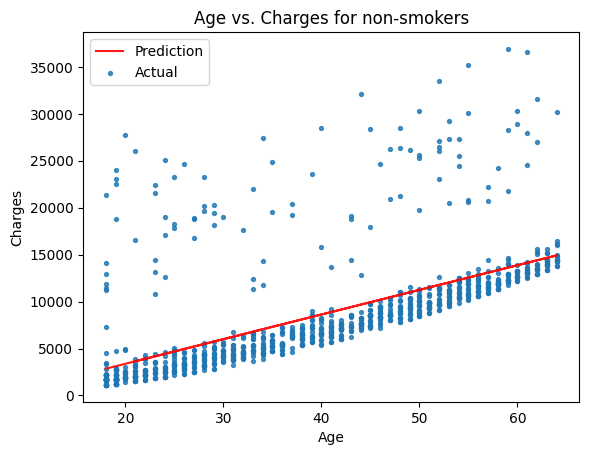

In [57]:
def estimate_charges(age, w, b):
    return w * age + b
def try_parameters(w, b):
    ages = non_smokers.age
    targets = non_smokers.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.title('Age vs. Charges for non-smokers')
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, targets, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    mse = error(w, b, non_smokers)
    rmse = np.sqrt(mse)      # Root Mean Squared Error
    print("RMSE: ",rmse)

try_parameters(w, b)

In [58]:
# Now that our model is trained, lets find the charge for a non-smoker whose age is lets suppose 34.
age = 34
charge = estimate_charges(age, w, b)
print(f"The medical charge for a non-smoker aged {age} is {charge}")

The medical charge for a non-smoker aged 34 is 7046.112216167795
